In [404]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [405]:
df_gov_bonds = pd.read_csv("original USA 10-year Government Bond Total Return Index (GFD Indices) 2021_09_14.csv")
df_corp_bonds = pd.read_csv("original US AAA Corporate Total Return (GFD Indices) 2021_09_15.csv")

In [406]:
df_gov_bonds.head()

,Date,Ticker,Close
0,1786/07/31,TRUSG10M,0.057581
1,1786/08/31,TRUSG10M,0.057581
2,1786/09/30,TRUSG10M,0.057581
3,1786/10/31,TRUSG10M,0.057581
4,1786/11/30,TRUSG10M,0.057581


In [407]:
df_corp_bonds.head()

,Date,Ticker,Close
0,1814/12/31,TRUSACOM,0.150922
1,1815/01/31,TRUSACOM,0.151551
2,1815/02/28,TRUSACOM,0.152182
3,1815/03/31,TRUSACOM,0.149876
4,1815/04/30,TRUSACOM,0.150533


In [408]:
df_corp_bonds['Date'] = pd.to_datetime(df_corp_bonds['Date'])
df_gov_bonds['Date'] = pd.to_datetime(df_gov_bonds['Date'])

In [409]:
# Restrict to post world war 2
df_corp_bonds = df_corp_bonds[df_corp_bonds["Date"] >= datetime(1949, 12, 1)] 
df_gov_bonds = df_gov_bonds[df_gov_bonds["Date"] >= datetime(1949, 12, 1)] 
# .loc[(df_gov_bonds['Date'].dt.month == 1) | (df_gov_bonds['Date'].dt.month == 12)]

In [410]:
# Compute change
df_corp_bonds["change"] = ((df_corp_bonds["Close"]/df_corp_bonds["Close"].shift(120)) - 1) / 10
df_gov_bonds["change"] = ((df_gov_bonds["Close"]/df_gov_bonds["Close"].shift(120)) - 1)/ 10

In [411]:
df_corp_bonds.tail()

,Date,Ticker,Close,change
2476,2021-04-30,TRUSACOM,24939.03088,0.071176
2477,2021-05-31,TRUSACOM,25085.37624,0.069482
2478,2021-06-30,TRUSACOM,25731.63564,0.075825
2479,2021-07-31,TRUSACOM,26053.91530,0.073213
2480,2021-08-31,TRUSACOM,26108.41141,0.067205


In [412]:
# Remove first 120 rows (12 * 10) 10 years on monthly data
df_corp_bonds_restricted = df_corp_bonds.iloc[120:, :]
df_gov_bonds_restricted = df_gov_bonds.iloc[120:, :]

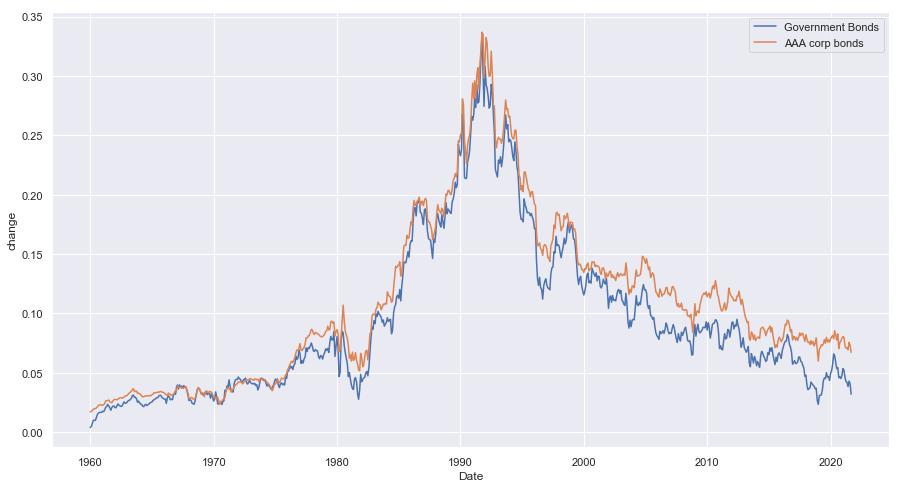

In [413]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
sns.lineplot(data=df_gov_bonds, x="Date", y="change")
sns.lineplot(data=df_corp_bonds, x="Date", y="change")
plt.legend(labels=["Government Bonds","AAA corp bonds"])

In [414]:
df_sp = pd.read_csv("original SP 500 Total Return Index (GFD Indices) 2021_09_15.csv")
df_sp['Date'] = pd.to_datetime(df_sp['Date'])

df_sp = df_sp[df_sp["Date"] >= datetime(1949, 12, 1)] # Post wwii
# Rolling 10 year return S&P 500
df_sp["change"] = (df_sp["Close"] - df_sp["Close"].shift(120)) / df_sp["Close"] / 10
df_sp["change"] = (df_sp["Close"] - df_sp["Close"].shift(120)) / (df_sp["Close"].shift(120)) / 10
# Remove first 10 years 
df_sp_restricted = df_sp.iloc[120:-1, :]

In [415]:
df_sp_restricted

,Date,Ticker,Close,change
1067,1959-12-31,GFTRUSASTD,20.502457,0.482153
1068,1960-01-31,GFTRUSASTD,19.092629,0.429872
1069,1960-02-29,GFTRUSASTD,19.323283,0.427992
1070,1960-03-31,GFTRUSASTD,19.110448,0.417145
1071,1960-04-30,GFTRUSASTD,18.831650,0.384920
...,...,...,...,...
1803,2021-04-30,GFTRUSASTD,8678.160000,0.276369
1804,2021-05-31,GFTRUSASTD,8738.770000,0.283337
1805,2021-06-30,GFTRUSASTD,8942.780000,0.298936
1806,2021-07-31,GFTRUSASTD,9155.210000,0.316889


In [416]:
df_gov_bonds_restricted

,Date,Ticker,Close,change
2081,1959-12-31,TRUSG10M,238.418534,0.003924
2082,1960-01-31,TRUSG10M,238.776081,0.004859
2083,1960-02-29,TRUSG10M,244.177764,0.007253
2084,1960-03-31,TRUSG10M,249.871368,0.009775
2085,1960-04-30,TRUSG10M,250.150683,0.010212
...,...,...,...,...
2817,2021-04-30,TRUSG10M,11240.674318,0.041995
2818,2021-05-31,TRUSG10M,11328.544167,0.038417
2819,2021-06-30,TRUSG10M,11479.487256,0.043039
2820,2021-07-31,TRUSG10M,11717.174359,0.040743


In [417]:
df_gov_bonds_restricted = df_gov_bonds_restricted.set_index('Date')
df_sp_restricted = df_sp_restricted.set_index('Date')

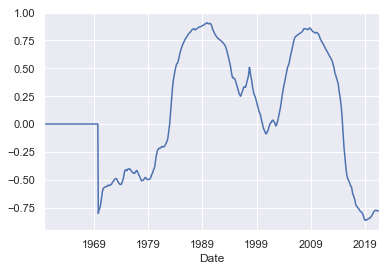

In [418]:
# Rolling correlation 
df_gov_bonds_restricted["change"].rolling(120).corr(df_sp_restricted["change"]).fillna(0).plot()